##### Homework #6. Improve behaviour exploration
#### Author: `Vladyslav Vakulenko`
#### Total time spent on h/w (in minutes): `600`

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
DIALOGS_MERGED_DATA_PATH = "../data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "../data/merged_data/dialogs_users_all.csv"

In [12]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH, low_memory=False)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

arr = df_meta['users'].to_numpy()

def idToName(id):
    filter_arr = []

    for user in arr:
        if str(user.split("'user_id': ")[1].split(',')[0]) == str(id):
            filter_arr.append(True)
        else:
            filter_arr.append(False)
    
    users = arr[filter_arr]
    
    if len(users):
        return str('@' + users[0].split("'username': '")[1].split("',")[0])
    else:
        return id

# 1. Top-10 users I mention most often via @ 

C:\Users\vlad\AppData\Local\Temp\ipykernel_2076\2339403893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[['message']] = res[['message']].apply(lambda x: [str('@' + y.split('@')[1].split(' ')[0].split(',')[0].split('\n')[0]) for y in x.to_numpy()])


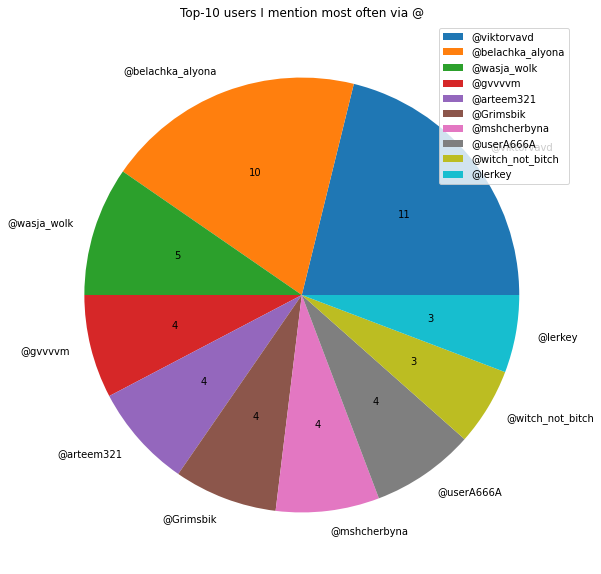

In [18]:
res = df[(df['type'] == 'text') & (df['message'].str.contains("@")) & (df['message'].str.contains("@ukr|@gmail|@ukma|@rentroom") == False) & (df['from_id'] == 'PeerUser(user_id=334960821)')]
res[['message']] = res[['message']].apply(lambda x: [str('@' + y.split('@')[1].split(' ')[0].split(',')[0].split('\n')[0]) for y in x.to_numpy()])

def arrayToResult(array, text):
    resDict = {i:array.count(i) for i in array}

    return pd.DataFrame.from_dict({'username': resDict.keys(), text: resDict.values()}).sort_values(by=[text], ascending=False).head(10).reset_index(drop=True)

finalRes = arrayToResult(res['message'].to_numpy().tolist(), 'times I mentioned').set_index('username')

finalRes.plot.pie(y='times I mentioned', figsize=(10, 10), autopct=lambda p: int(p/100.*np.sum(finalRes['times I mentioned'].to_numpy())))
plt.ylabel("")
plt.title('Top-10 users I mention most often via @')
plt.show()

# 2. Top-10 who mentioned me most often via @

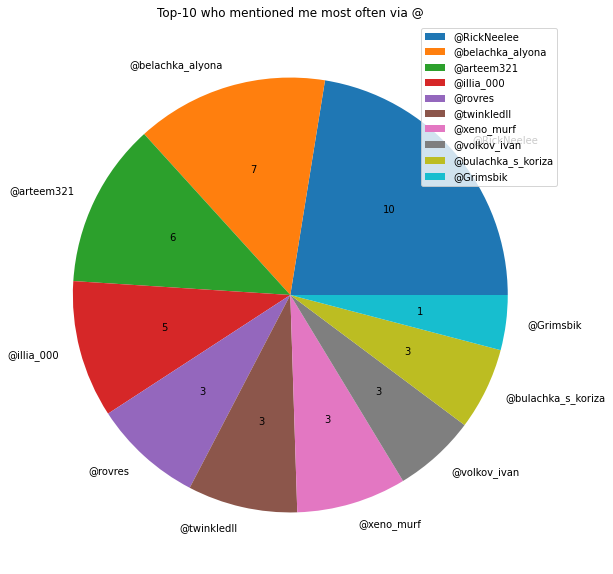

In [19]:
res = df[(df['type'] == 'text') & (df['message'].str.contains("@vlad_v_s21")) & (df['from_id'] == df['from_id'])]
res = [idToName(x.split('PeerUser(user_id=')[1].split(')')[0]) for x in res['from_id'].to_numpy()]

finalRes = arrayToResult(res, 'times I was mentioned').set_index('username')

finalRes.plot.pie(y='times I was mentioned', figsize=(10, 10), autopct=lambda p: int(p/100.*np.sum(finalRes['times I was mentioned'].to_numpy())))
plt.ylabel("")
plt.title('Top-10 who mentioned me most often via @')
plt.show()

# 3. Plots for Top-5 chats I wrote more messages
### This graph shows the most common length of conversations per day in my top-5 chats

C:\Users\vlad\AppData\Local\Temp\ipykernel_2076\2826189139.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allMess[['date']] = allMess[['date']].apply(lambda x: [datetime.datetime.strptime(y, "%Y-%m-%d %H:%M:%S%z").date() for y in x.to_numpy()])
C:\Users\vlad\AppData\Local\Temp\ipykernel_2076\2826189139.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res0 = allMess[df['to_id'] == toWhomIWrote['to_id'].to_numpy().tolist()[0]].groupby(["date", "to_id"])["id"].count()
C:\Users\vlad\AppData\Local\Temp\ipykernel_2076\2826189139.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res1 = allMess[df['to_id'] == toWhomIWrote['to_id'].to_numpy().tolist()[1]].groupby(["date", "to_id"]

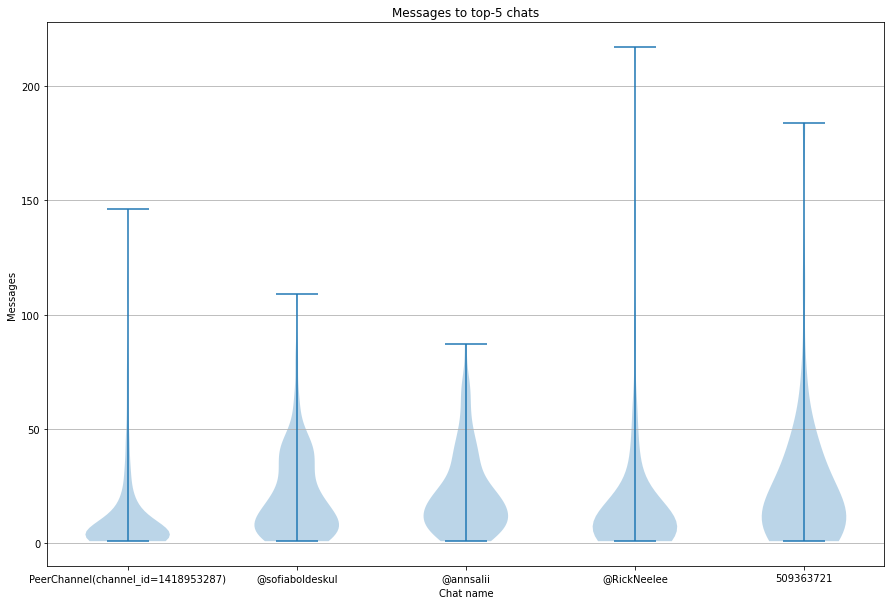

In [20]:
import datetime
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))

toWhomIWrote = df[df['from_id'] == 'PeerUser(user_id=334960821)'].groupby(["to_id"])["id"].count().to_frame().sort_values(by=['id'], ascending=False).rename(columns={"id": "num_of_written_messages_by_me"}).head(5).reset_index()

allMess = df[(df['from_id'] == 'PeerUser(user_id=334960821)') & (df['to_id'].isin(toWhomIWrote['to_id'].to_numpy().tolist()))]
allMess[['date']] = allMess[['date']].apply(lambda x: [datetime.datetime.strptime(y, "%Y-%m-%d %H:%M:%S%z").date() for y in x.to_numpy()])

res0 = allMess[df['to_id'] == toWhomIWrote['to_id'].to_numpy().tolist()[0]].groupby(["date", "to_id"])["id"].count()
res1 = allMess[df['to_id'] == toWhomIWrote['to_id'].to_numpy().tolist()[1]].groupby(["date", "to_id"])["id"].count()
res2 = allMess[df['to_id'] == toWhomIWrote['to_id'].to_numpy().tolist()[2]].groupby(["date", "to_id"])["id"].count()
res3 = allMess[df['to_id'] == toWhomIWrote['to_id'].to_numpy().tolist()[3]].groupby(["date", "to_id"])["id"].count()
res4 = allMess[df['to_id'] == toWhomIWrote['to_id'].to_numpy().tolist()[4]].groupby(["date", "to_id"])["id"].count()

ax.violinplot(dataset = [res0, res1, res2, res3, res4])

ax.set_title('Messages to top-5 chats')
ax.yaxis.grid(True)
ax.set_xlabel('Chat name')
ax.set_ylabel('Messages')

labels = []
for id in toWhomIWrote['to_id'].to_numpy().tolist()[:5]:
    labels.append(idToName(id))
    
ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)

plt.show()

# 4. Top-10 people to whom I sent the biggest amount of stickers

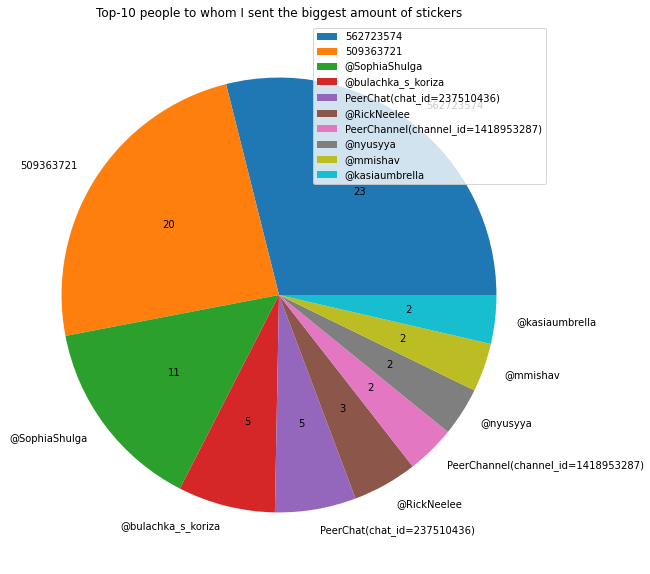

In [21]:
toWhomISent = df[(df['from_id'] == 'PeerUser(user_id=334960821)') & (df['type'] == 'sticker')].groupby(["to_id"])["id"].count().to_frame().sort_values(by=['id'], ascending=False).rename(columns={"id": "num_of_written_messages_by_me"}).head(10).reset_index()

toWhomISent[['to_id']] = toWhomISent[['to_id']].apply(lambda x: [idToName(y) for y in x.to_numpy()])

toWhomISent.set_index('to_id').plot.pie(y='num_of_written_messages_by_me', figsize=(10, 10), autopct=lambda p: int(p/100.*np.sum(toWhomISent['num_of_written_messages_by_me'].to_numpy())))
plt.ylabel("")
plt.title('Top-10 people to whom I sent the biggest amount of stickers')
plt.show()

# 5. Top-10 people who sent me the biggest amount of stickers

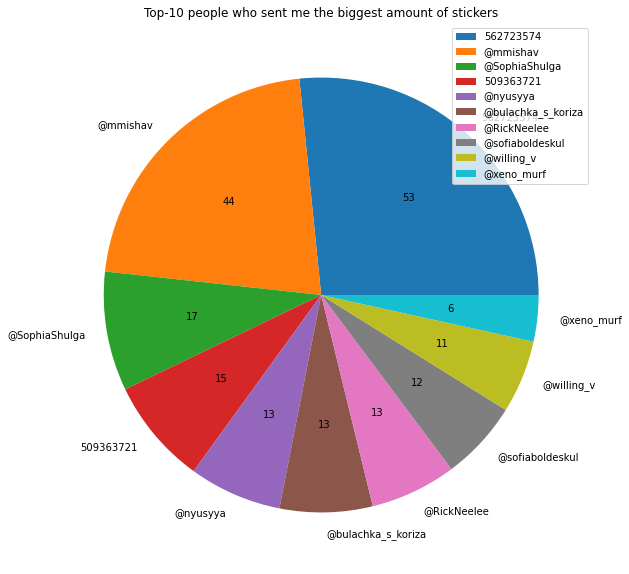

In [22]:
whoSentMe = df[(df['to_id'] == '334960821') & (df['type'] == 'sticker')].groupby(["dialog_id"])["id"].count().to_frame().sort_values(by=['id'], ascending=False).rename(columns={"id": "num_of_written_messages_to_me"}).head(10).reset_index()

whoSentMe[['dialog_id']] = whoSentMe[['dialog_id']].apply(lambda x: [idToName(y) for y in x.to_numpy()])

whoSentMe.set_index('dialog_id').plot.pie(y='num_of_written_messages_to_me', figsize=(10, 10), autopct=lambda p: int(p/100.*np.sum(whoSentMe['num_of_written_messages_to_me'].to_numpy())))

plt.ylabel("")
plt.title('Top-10 people who sent me the biggest amount of stickers')
plt.show()

# 6. How many people I chat with in the time
### This plot shows how many chats were active every day during my presence in Telegram

C:\Users\vlad\AppData\Local\Temp\ipykernel_2076\1825452294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[['date']] = res[['date']].apply(lambda x: [datetime.datetime.strptime(y, "%Y-%m-%d %H:%M:%S%z").date() for y in x.to_numpy()])


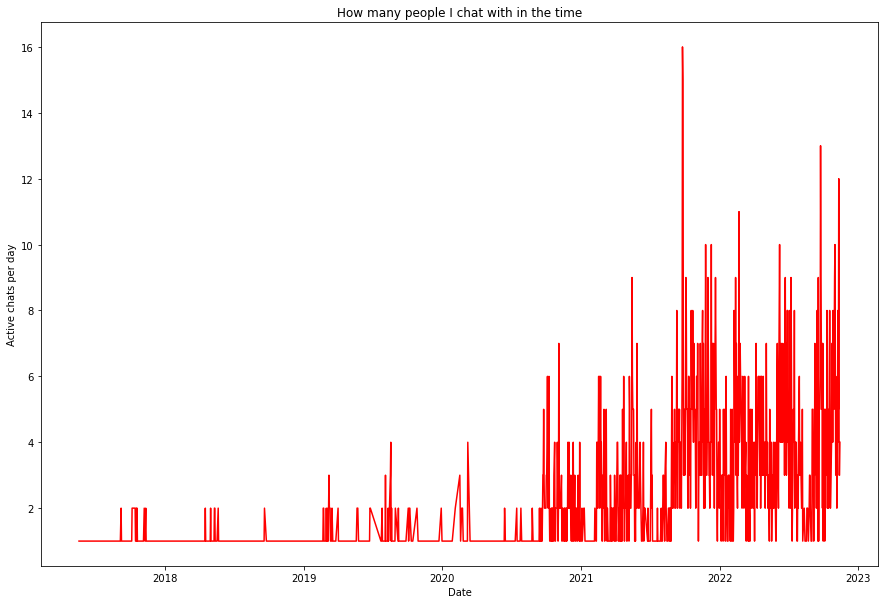

In [23]:
res = df[df['from_id'] == 'PeerUser(user_id=334960821)']
res[['date']] = res[['date']].apply(lambda x: [datetime.datetime.strptime(y, "%Y-%m-%d %H:%M:%S%z").date() for y in x.to_numpy()])

res = res.groupby(["date", "to_id"])["id"].count().to_frame().reset_index().groupby(['date'])["to_id"].count()

res.plot(x = 'date', y = 'id', kind = 'line', color = 'red', figsize=(15, 10))

plt.xlabel("Date")
plt.ylabel("Active chats per day")
plt.title('How many people I chat with in the time')

plt.show()

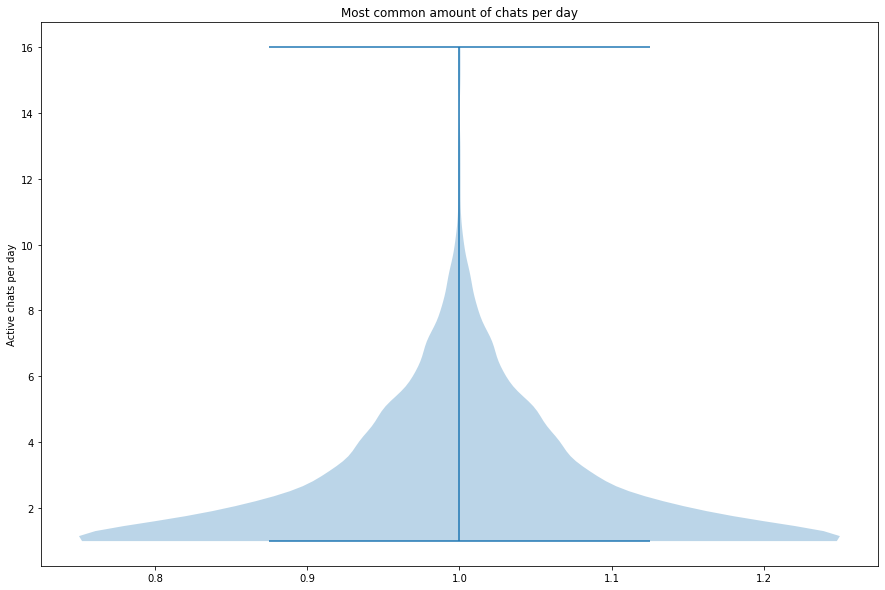

In [24]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.violinplot(dataset = [res])

plt.xlabel("")
plt.ylabel("Active chats per day")
plt.title('Most common amount of chats per day')

plt.show()

# 7. How many people have remained in my circle of constant communication for six months
### Obviously, from these graphs it can be concluded that most interlocutors drop out over time. However, it can also be concluded that in almost 5 years, the number of "acquaintances" has grown from 4-9 to 40-60 in six months. Also, "conversion" (ie, the number of contacts left since then) has improved significantly over the past two years and remains at 50%

C:\Users\vlad\AppData\Local\Temp\ipykernel_2076\2654264452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[['date']] = res[['date']].apply(lambda x: [datetime.datetime.strptime(y, "%Y-%m-%d %H:%M:%S%z").date() for y in x.to_numpy()])


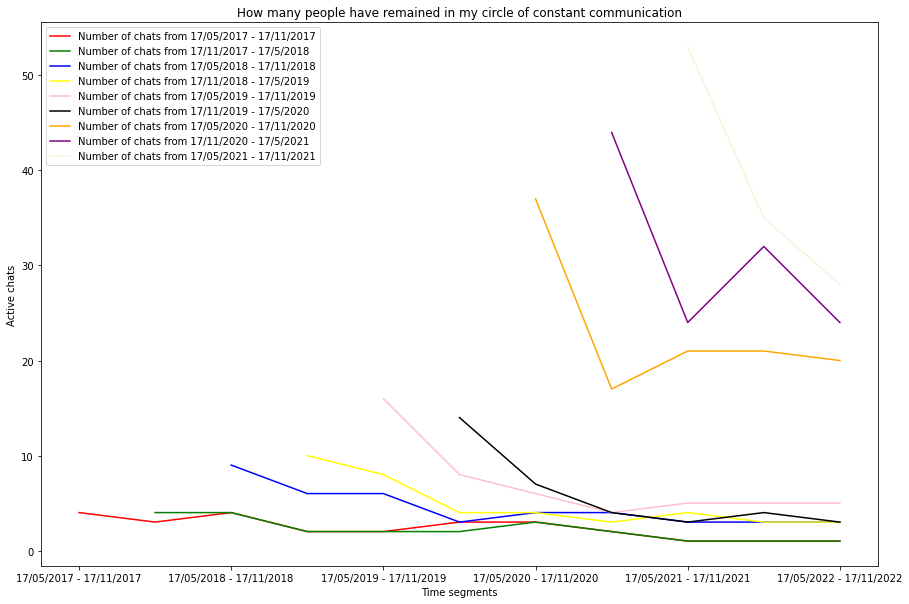

In [83]:
from datetime import date

res = df[(df['from_id'] == 'PeerUser(user_id=334960821)')]
res[['date']] = res[['date']].apply(lambda x: [datetime.datetime.strptime(y, "%Y-%m-%d %H:%M:%S%z").date() for y in x.to_numpy()])

res1 = set(res[(date(2017, 5, 17) < res['date']) & (res['date'] < date(2017, 11, 17))]['to_id'].to_numpy())
res2 = set(res[(date(2017, 11, 18) < res['date']) & (res['date'] < date(2018, 5, 16))]['to_id'].to_numpy())
res3 = set(res[(date(2018, 5, 17) < res['date']) & (res['date'] < date(2018, 11, 17))]['to_id'].to_numpy())
res4 = set(res[(date(2018, 11, 18) < res['date']) & (res['date'] < date(2019, 5, 16))]['to_id'].to_numpy())
res5 = set(res[(date(2019, 5, 17) < res['date']) & (res['date'] < date(2019, 11, 17))]['to_id'].to_numpy())
res6 = set(res[(date(2019, 11, 18) < res['date']) & (res['date'] < date(2020, 5, 16))]['to_id'].to_numpy())
res7 = set(res[(date(2020, 5, 17) < res['date']) & (res['date'] < date(2020, 11, 17))]['to_id'].to_numpy())
res8 = set(res[(date(2020, 11, 18) < res['date']) & (res['date'] < date(2021, 5, 16))]['to_id'].to_numpy())
res9 = set(res[(date(2021, 5, 17) < res['date']) & (res['date'] < date(2021, 11, 17))]['to_id'].to_numpy())
res10 = set(res[(date(2021, 11, 18) < res['date']) & (res['date'] < date(2022, 5, 16))]['to_id'].to_numpy())
res11 = set(res[(date(2022, 5, 17) < res['date']) & (res['date'] < date(2022, 11, 17))]['to_id'].to_numpy())

dates = [
    '17/05/2017 - 17/11/2017',
    '17/11/2017 - 17/5/2018',
    '17/05/2018 - 17/11/2018',
    '17/11/2018 - 17/5/2019',
    '17/05/2019 - 17/11/2019',
    '17/11/2019 - 17/5/2020',
    '17/05/2020 - 17/11/2020',
    '17/11/2020 - 17/5/2021',
    '17/05/2021 - 17/11/2021',
    '17/11/2021 - 17/5/2022',
    '17/05/2022 - 17/11/2022'
]

results = [
    res1,
    res2,
    res3,
    res4,
    res5,
    res6,
    res7,
    res8,
    res9,
    res10,
    res11
]
    
def dfToPlot(x, y):
    def filterFun(z):
        if z in y:
            return True
        else:
            return False
        
    return len(list(filter(filterFun, x)))

res = pd.concat([
    pd.DataFrame.from_dict({'date': dates, ('Number of chats from '+dates[0]): [dfToPlot(x, res1) for x in results]}).set_index('date'), 
    pd.DataFrame.from_dict({'date': dates[1:], ('Number of chats from '+dates[1]): [dfToPlot(x, res2) for x in results[1:]]}).set_index('date'),
    pd.DataFrame.from_dict({'date': dates[2:], ('Number of chats from '+dates[2]): [dfToPlot(x, res3) for x in results[2:]]}).set_index('date'),
    pd.DataFrame.from_dict({'date': dates[3:], ('Number of chats from '+dates[3]): [dfToPlot(x, res4) for x in results[3:]]}).set_index('date'),
    pd.DataFrame.from_dict({'date': dates[4:], ('Number of chats from '+dates[4]): [dfToPlot(x, res5) for x in results[4:]]}).set_index('date'),
    pd.DataFrame.from_dict({'date': dates[5:], ('Number of chats from '+dates[5]): [dfToPlot(x, res6) for x in results[5:]]}).set_index('date'),
    pd.DataFrame.from_dict({'date': dates[6:], ('Number of chats from '+dates[6]): [dfToPlot(x, res7) for x in results[6:]]}).set_index('date'),
    pd.DataFrame.from_dict({'date': dates[7:], ('Number of chats from '+dates[7]): [dfToPlot(x, res8) for x in results[7:]]}).set_index('date'),
    pd.DataFrame.from_dict({'date': dates[8:], ('Number of chats from '+dates[8]): [dfToPlot(x, res9) for x in results[8:]]}).set_index('date'),
], axis=1)

res = res.loc[:, ~res.columns.duplicated()]

colors = np.array([0, 10, 20, 30, 40, 45, 50, 55, 60, 70, 80, 90])

res.plot(label='res', color=["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"], figsize=(15, 10))

plt.xlabel("Time segments")
plt.ylabel("Active chats")
plt.title('How many people have remained in my circle of constant communication')

plt.show()

# 8. What time of day do people send the most audio messages?
### According to the results, it can be concluded that around 16-17 hours, the number of audio messages increases compared to text messages. To me, this suggests that the workday is coming to an end, people are starting to chat, but are still busy, so they use audio messages, which are faster and less distracting. Also, audio messages are used at night, when it is not so convenient to type

C:\Users\vlad\AppData\Local\Temp\ipykernel_2076\2930888749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[['date']] = res[['date']].apply(lambda x: [datetime.datetime.strptime(y, "%Y-%m-%d %H:%M:%S%z").hour for y in x.to_numpy()])
C:\Users\vlad\AppData\Local\Temp\ipykernel_2076\2930888749.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res1[['date']] = res1[['date']].apply(lambda x: [datetime.datetime.strptime(y, "%Y-%m-%d %H:%M:%S%z").hour for y in x.to_numpy()])


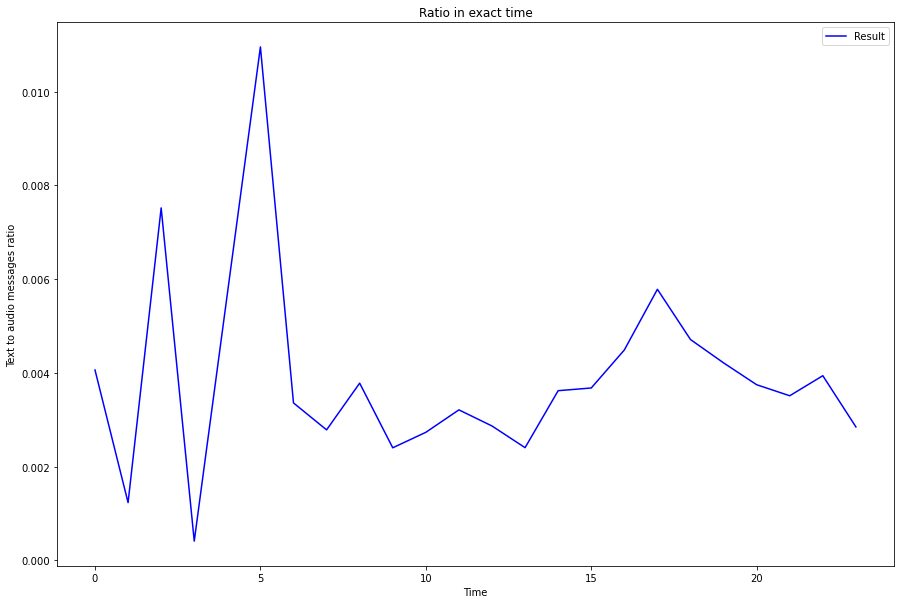

In [34]:
res = df[(df['type'] == 'voice')]
res[['date']] = res[['date']].apply(lambda x: [datetime.datetime.strptime(y, "%Y-%m-%d %H:%M:%S%z").hour for y in x.to_numpy()])

res = res.groupby('date')['id'].count().reset_index()

res1 = df[(df['type'] == 'text')]
res1[['date']] = res1[['date']].apply(lambda x: [datetime.datetime.strptime(y, "%Y-%m-%d %H:%M:%S%z").hour for y in x.to_numpy()])

res1 = res1.groupby('date')['id'].count().reset_index()

res['Result'] = res['id']/res1['id']

res.plot(x = 'date', y = 'Result', kind = 'line', color = 'blue', figsize=(15, 10))

plt.xlabel("Time")
plt.ylabel("Text to audio messages ratio")
plt.title('Ratio in exact time')

plt.show()

# 9. Average amount of messages per conversation in popular chats
### Conversation is an array of messages, the time difference of which does not exceed 8 hours

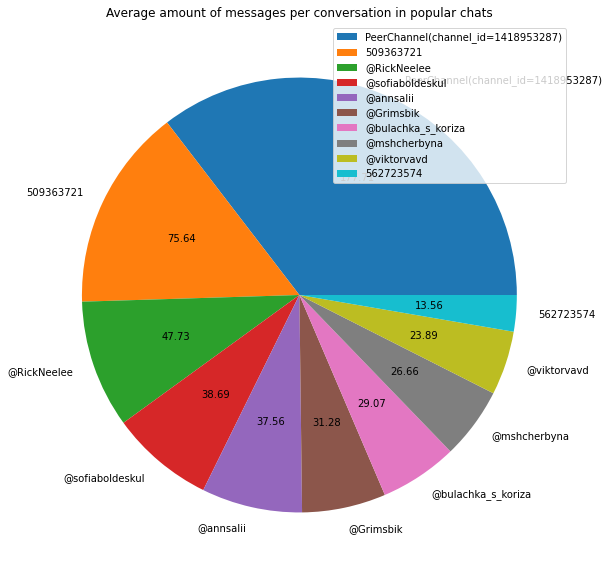

In [35]:
from statistics import mean

def idToMean(x):    
    res = df[df['dialog_id'] == int(x.replace('PeerChannel(channel_id=', '').replace(')', ''))]
    array = res['date'].to_numpy().tolist()
    
    if len(array) == 0: 
        res = df[df['dialog_id'] == -int(x.replace('PeerChannel(channel_id=', '').replace(')', ''))]
        array = res['date'].to_numpy().tolist()
        
        if len(array) == 0: 
            res = df[df['dialog_id'] == int('-100' + x.replace('PeerChannel(channel_id=', '').replace(')', ''))]
            array = res['date'].to_numpy().tolist()

            if len(array) == 0: 
                return 0

    obj = {
        array[0]: 0
    }

    for time in array:
        prevTime = list(obj.keys())[-1]
        if (datetime.datetime.strptime(prevTime, "%Y-%m-%d %H:%M:%S%z") - datetime.datetime.strptime(time, "%Y-%m-%d %H:%M:%S%z")).seconds//3600 < 8:
            obj[prevTime] += 1
        else:
            obj[time] = 1

    return round(mean(list(obj.values())), 2)

toWhomIWrote = df[df['from_id'] == 'PeerUser(user_id=334960821)'].groupby(["to_id"])["id"].count().to_frame().sort_values(by=['id'], ascending=False).rename(columns={"id": "num_of_written_messages_by_me"}).head(10).reset_index()
toWhomIWrote['username'] = toWhomIWrote['to_id']

toWhomIWrote[['username']] = toWhomIWrote[['username']].apply(lambda x: [idToName(y) for y in x.to_numpy()])
toWhomIWrote[['to_id']] = toWhomIWrote[['to_id']].apply(lambda x: [idToMean(y) for y in x.to_numpy()])
toWhomIWrote = toWhomIWrote.drop('num_of_written_messages_by_me', axis=1)

toWhomIWrote = toWhomIWrote.sort_values(by=['to_id'], ascending=False).rename(columns={"to_id": "average amount of messages per conversation"}).reset_index(drop=True)

toWhomIWrote.set_index('username').plot.pie(y='average amount of messages per conversation', figsize=(10, 10), autopct=lambda p: round(p/100.*np.sum(toWhomIWrote['average amount of messages per conversation'].to_numpy()), 2))

plt.xlabel("")
plt.ylabel("")
plt.title('Average amount of messages per conversation in popular chats')

plt.show()

# 10. Average amount of simultaneous activity in time
### This graph shows how many people I communicated with on average in 1 hour during the entire period of using Telegram

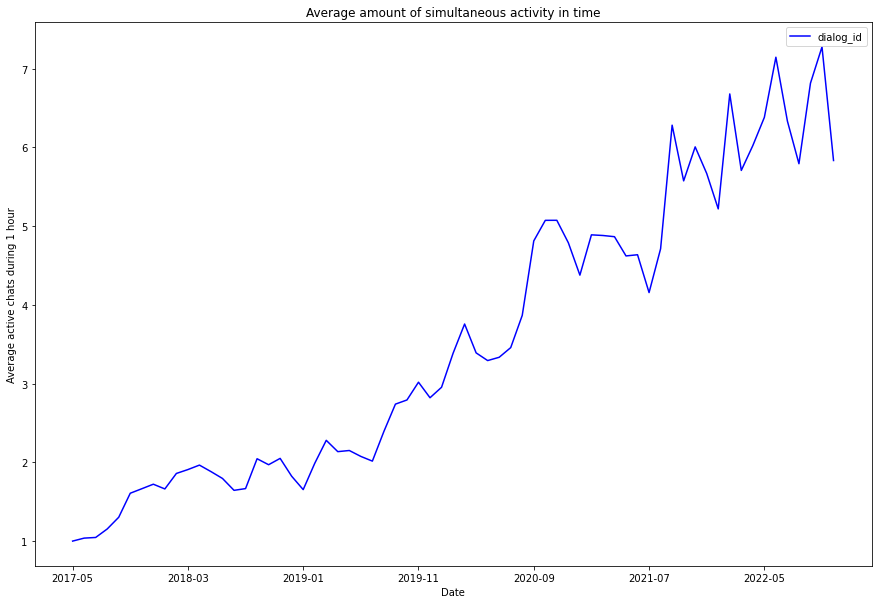

In [36]:
res = df[df['date'] != '']
res[['date']] = res[['date']].apply(lambda x: [y[0:-12] for y in x.to_numpy()])

res = res[['dialog_id', 'date']].drop_duplicates().groupby('date').count().reset_index()

res[['date']] = res[['date']].apply(lambda x: [y[0:-6] for y in x.to_numpy()])

res = res.groupby('date').mean().reset_index()

res.plot(x = 'date', y = 'dialog_id', kind = 'line', color = 'blue', figsize=(15, 10))

plt.xlabel("Date")
plt.ylabel("Average active chats during 1 hour")
plt.title('Average amount of simultaneous activity in time')

plt.show()

# 11. Top people by typing speed in my contacts
### Speed is limited by 17, because record of typing is 1060 symbols in a minute 

C:\Users\vlad\AppData\Local\Temp\ipykernel_2076\561400704.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res[['message']] = res[['message']].apply(lambda x: [len(str(y)) for y in x.to_numpy()])


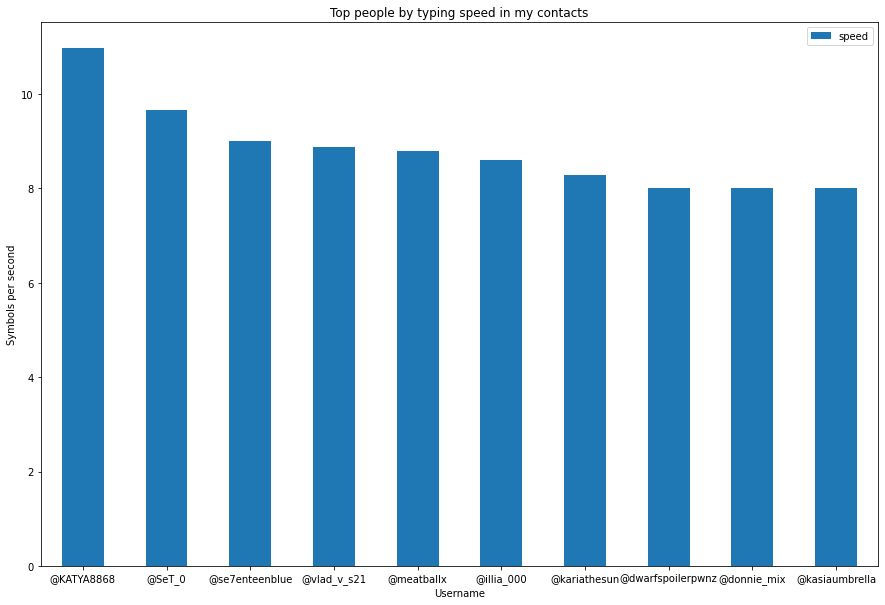

In [37]:
def arrayOfDatesToSpaces(arrOfDate, arrOfLen):
    default = arrOfDate[0]
    resArr = []
    
    for i in list(range(1, len(arrOfDate))):
        diff = (datetime.datetime.strptime(default, "%Y-%m-%d %H:%M:%S%z") - datetime.datetime.strptime(arrOfDate[i], "%Y-%m-%d %H:%M:%S%z")).seconds
        if diff == 0:
            diff = 1
        resArr.append(str(int(arrOfLen[i-1]) / diff))
        default = arrOfDate[i]
    resArr.append('0')
    
    return round(float(max(resArr)), 2)

res = df[(df['type'] == 'text') & (df['dialog_id'] > 0) & (df['from_id'] != 'PeerUser(user_id=334960821)') & (df['fwd_from'] != df['fwd_from'])]
res[['message']] = res[['message']].apply(lambda x: [len(str(y)) for y in x.to_numpy()])
res = res[['date', 'message', 'dialog_id']]

ids = set(res['dialog_id'].to_numpy())

dictRes = {}

for i in ids:
    iRes = arrayOfDatesToSpaces(res[res['dialog_id'] == i]['date'].to_numpy(), res[res['dialog_id'] == i]['message'].to_numpy())
    if iRes != 0 and iRes < 17:
        dictRes[idToName(i)] = iRes

res = pd.DataFrame.from_dict({'username': dictRes.keys(), 'speed': dictRes.values()}).sort_values(by=['speed'], ascending=False).head(10).reset_index(drop=True)

res.set_index("username").plot.bar(rot=0, figsize=(15, 10))

plt.xlabel("Username")
plt.ylabel("Symbols per second")
plt.title('Top people by typing speed in my contacts')

plt.show()